In [84]:
#DGP
import numpy as np
import pandas as pd
import random

# n = 200  #firm num
# T = 100  #time num
#To simplify the simulation, we change the x_{i,(t-1)} ,r_{i,t} to x_n, r_n, 
# which means denote all the variable with  n th news rather than i th firm in t th day
np.random.seed(66)
S = 500  #word num
n = 10000  #news num
p = 8 #dim of latent space

#x ~ Normal
mu_x = 0
sigma_x = 0.14
x = np.random.normal(mu_x,sigma_x,(n,p))  #latent variable n x p

# beta controls signal-noise ratio 0.5, 10, 100 ###normal?
beta = np.random.normal(0.5,0,p) 
#noise~ Normal
sigma_epsilon = 0.05
epsilon = np.random.normal(0,sigma_epsilon,n)

# return
r = x @ beta + epsilon 
ratio_r = np.var(x @ beta)/(np.var(x @ beta)+np.var(epsilon))

#Gamma controls sentiment signals S x p
K = 50 #num of neg/pos sentiment words nums
s1 = 1 #lower bound of the sentiment strength  (non-neg)
s2 = 5 #upper bound of the sentiment strength 
gamma = np.zeros((S,p))  
gamma[:K] = np.random.uniform(s1,s2,(K,p)) 
gamma[-K:] = np.random.uniform(-s2,-s1,(K,p))

#theta control the sparsity of word matrix W
mu_b = 0.5
mu_theta = -5
sigma_theta = 0.05
theta = np.random.binomial(1, mu_b,(n,S)) * np.random.normal(mu_theta, sigma_theta,(n,S))

#paramenter of Poisson distribution
lam = np.exp( x @ gamma.T + theta)

# words count matrix
W = np.random.poisson(lam,(n,S))


# words count of each article
total_words_example = np.mean(np.sum(W,axis=1))

## calculate sparcity 
sparcity = 1 - np.count_nonzero(W)/W.size

print("sparsity of W:", sparcity)
print("signal-to-noise ratio:", ratio_r)
print("neg return num:",np.sum(r<0) )

W_train = W[:9000]
r_train = r[:9000]
W_test = W[9000:]
r_test = r[9000:]


sparsity of W: 0.6815106
signal-to-noise ratio: 0.9416661653064528
neg return num: 4901


In [4]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy import sparse
word_file = 'results_multiyears_stemmed_word_count/2005_2014_stemmed_word_count_usewordnet.csv'
df_words = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + word_file)
df_words = df_words.dropna().reset_index(drop = True).reset_index()

word_file0 = 'results_multiyears_stemmed_word_count/2005_2014_stemmed_word_count.csv'
df_words0 = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + word_file0)
df_words0 = df_words0.dropna().reset_index(drop = True).reset_index()

In [15]:
'''
Author: Naixin && naixinguo2-c@my.cityu.edu.hk
Date: 2022-11-04 22:45:47
LastEditors: Naixin && naixinguo2-c@my.cityu.edu.hk
LastEditTime: 2022-11-23 12:59:06
FilePath: /Gtext/reproduction/xiu/selectword_view1.ipynb
Description: 

'''
###XIU DGP
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import spearmanr
np.random.seed(66)

def idfunc1(j):
    return 1 if j<S/2  else 0
def idfunc2(j):
    return 1 if j>=S/2  else 0
n = 10000
n0 = 9000
m = 500
S = 100
sbar = 10
nbar = 100

multi_WS_index=[0]*(S+1)

# np.random.seed(66)

p = np.random.uniform(0,1,n)
si = np.random.uniform(0,2*sbar,n)
ni = np.random.uniform(0,2*nbar,n)
omiga = np.array([1/(m-S)*np.random.uniform(0,2) for _ in range(S,m)])
# omiga = preprocessing.normalize(omiga.reshape(-1, 1))[:,0]
Oplus = np.array([2/S * (1-j/S)**2 + 2/(3*S) * idfunc1(j) for j in range(S)])
Ominus = np.array([2/S * (j/S)**2 + 2/(3*S) * idfunc2(j) for j in range(S)])
F = (Oplus + Ominus)/2
T = (Oplus - Ominus)/2
dsi = [(np.random.multinomial(si[i], (p[i]*Oplus + (1-p[i])*Ominus)/ sum(p[i]*Oplus + (1-p[i])*Ominus),S)[0])for i in range(n)]
dni = [(np.random.multinomial(ni[i], omiga/sum(omiga), m-S ))[0] for i in range(n)]
d = [list(dsi[i])+list(dni[i]) for i in range(n)]
d = np.array(d,dtype=object)
y =np.abs(np.random.standard_t(4, size=n))
ysign = np.zeros(n)
pindex=list(np.nonzero([np.random.binomial(1,p[i],1) for i in range(n)])[0])
nindex=list(set(range(n))-set(pindex))
ysign[pindex] = 1
ysign[nindex] = -1
y = y*ysign
 
    

In [5]:
final_word=df_words.final_word
final_word0=df_words0.final_word


In [ ]:
# import nltk
# from nltk.corpus import words
# from nltk.corpus import wordnet
# from nltk.corpus import brown
# #nltk.download('wordnet')
# # nltk.download('words')
# words1 = set(nltk.corpus.words.words())
# words2 = set(nltk.corpus.wordnet.words())
# words3 = set(nltk.corpus.brown.words())
# print(len(words1),len(words2),len(words3))
 

print('britches' in words1,'britches' in words2,'britches' in words3)
print('unfriendly' in words1,'unfriendly' in words2,'unfriendly' in words3)
print('website' in words1,'website' in words2,'website' in words3)
print('unsuitable' in words1,'unsuitable' in words2,'unsuitable' in words3)
print('outsold' in words1,'outsold' in words2,'outsold' in words3)
print('p' in words1,'p' in words2,'p' in words3)
print('sweeter' in words1,'sweeter' in words2,'sweeter' in words3)
print('worst' in words1,'worst' in words2,'worst' in words3)
print('xxii' in words1,'xxii' in words2,'xxii' in words3)
print('ly' in words1,'ly' in words2,'ly' in words3)

In [ ]:

print(set(final_word0)^set(final_word))

In [11]:
print(len(final_word),print(len(final_word0)))

21791
23244 None


In [1]:
'''
Author: Naixin && naixinguo2-c@my.cityu.edu.hk
Date: 2022-11-01 14:50:18
LastEditors: Naixin && naixinguo2-c@my.cityu.edu.hk
LastEditTime: 2022-11-01 14:52:17
FilePath: /Gtext/xiu/fixword_ex.ipynb
Description: 

'''

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy import sparse


##################### Could be changed part ##########################
sparse_folder = 'results_primary_news_sparse_multiyears/'
index_folder = 'results_primary_news_index_multiyears/'

sparse_file = '2005_2020_sparse/2005_2014_sparse_threecol.csv'
index_file = '2005_2020_index_news/2005_2014_index_news.csv'
word_file = '2005_2014_stemmed_word_count.csv'
# word_file = 'results_multiyears_stemmed_word_count/2005_2014_stemmed_word_count.csv'

sparse_file0 = '2005_2020_sparse/2015_2019_sparse_threecol.csv'
index_file0 = '2005_2020_index_news/2015_2019_index_news.csv'


sparse_file1 = '2005_2020_sparse/2020_2020_sparse_threecol.csv'
index_file1 = '2005_2020_index_news/2020_2020_index_news.csv'

######################################################################

######################## Could be put in the function module py file ########################
# Define a function to transform data from three columns to sparse matrix
def trans_data(sparse_data, news_data, word_data):
    '''
    :param sparse_data: the three column saved words DataFrame includes 'Row', 'Column', 'Value'
    :param news_data: news DataFrame includes 'Row_ID', 'permno', 'returnday_1', 'threedayreturn', 'title'
    :param word_data: words DataFrame includes 'WordIndex', 'final_word', 'TotalWordNum', 'TotalBodyNum'

    :return W_array: sparse matrix of word counts, n*k --> n: # of news, k: # of words
    :return r_array: return vector, length == # of news
    :return stkcd_array: permno vector, length == # of news
    :return date_array: date vector, length == # of news
    '''
    if 'return' in news_data.columns :
        r_array = np.array(news_data['return'])
        date_array = np.array(news_data['returnday'])
    else:  
        r_array = np.array(news_data['threedayreturn'])
        date_array = np.array(news_data['returnday_1'])
    stkcd_array = np.array(news_data['permno'])
    
    
    # Transform three columns to sparse matrix W
    newrowarray = np.array(sparse_data['Row'])
    newcolarray = np.array(sparse_data['Column'])
    newvaluearray = np.array(sparse_data['Value'])

    W_array = sparse.csr_matrix((newvaluearray, (newrowarray, newcolarray)), shape = (newrowarray[-1]+1, word_data.shape[0])).toarray()

    return W_array, r_array, stkcd_array, date_array

#############################################################################################

# Load in data set
df_sparse = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file)
df_newsindex = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file)
df_words = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + word_file)
df_words = df_words.dropna().reset_index(drop = True).reset_index()

df_sparse0= pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file0)
df_newsindex0 = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file0)


df_sparse1= pd.read_csv('/home/yuanzhi/Text_individual/codes/' + sparse_folder + sparse_file1)
df_newsindex1 = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + index_folder + index_file1)

W_train, r_train, stkcd, datearray = trans_data(df_sparse, df_newsindex, df_words)
W_vali, r_vali, stkcd0, datearray0 = trans_data(df_sparse0, df_newsindex0, df_words)
W_test, r_test, stkcd1, datearray1 = trans_data(df_sparse1, df_newsindex1, df_words)



In [269]:
W_train, r_train, stkcd, datearray = trans_data(df_sparse, df_newsindex, df_words)

In [16]:
W_train, r_train = d[:n0],y[:n0]
W_test, r_test = d[n0:],y[n0:]

In [ ]:
import numpy as np
from time import process_time

start = process_time()

elapsed = (process_time() - start)

print("eigh elapsed time: ", elapsed)



In [118]:
'''

'''
import heapq
import os

import numpy as np
import pandas as pd
from scipy import sparse
from sklearn import linear_model
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import Lasso  # ##导入Lasso回归算法


import matplotlib
import matplotlib.pyplot as plt

from bisect import bisect_left

#someusful funcs
def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    return after if after - myNumber < myNumber - before else before

################## Could be changed part #######################


####################
class Farmpredict:
    '''
    Input:
        n: Number of news, int
        S: Number of words, we choose 10,000 here, int
        p: How many PCA Factors want to choose, according Fan(2021), int
        r: stock return vector, n*1, array
        W_train: sparse matrix of total dataset, dimension in n * K, array
    
    Return:
        S_set: correlation screening results, list in length of 1000
        lasso_index: Non-zero index of optimal lasso model of S_set, list
        lasso_Beta: optimal lasso model's coefficients, array
        lasso_beta: Non-zero coefficients of optimal lasso model
        loading: In-Sample B_hat
        insregLRcoef: In-Sample linear regression coefficients between r and pcafactor
        lasso_alpha: optimal lasso model's intercept
        insregLRint: In-Sample linear regression intercept between r and pcafactor
    '''
    def __init__(self):
        self.p = 8
        self.W_train = W_train
        self.n = W_train.shape[0]
        self.r_train = r_train
        self.W_test = W_test
        self.r_test = r_test
        # self.freqnum = 10000
        self.freqnum = 500
        # self.screen_num = 1000 # screening number
        self.screen_num = 200
        self.pcafactor = 0
        self.pcau = 0
        self.loading = 0
        self.variable_num = 100 # final words want to choose
        self.jobs = 30

    # First screen
    def pca(self):
        Wsum = sum(self.W_train)
        self.freq_index = [heapq.nlargest(self.freqnum, enumerate(Wsum), key=lambda x: x[1])[i][0] for i in range(self.freqnum)]

        W_train = self.W_train[:, self.freq_index]
        print('W_train first screen done:',W_train.shape)
        # PCA for words count matrix 
        svdtest = TruncatedSVD(n_components=self.p, n_iter=7, random_state=64)
        self.pcafactor = svdtest.fit_transform(W_train) 
        self.loading = svdtest.components_.T 
        self.pcau = np.array(W_train - (self.pcafactor @ self.loading.T))
        
        # print('singular_values', svdtest.singular_values_)
        
        figure=plt.figure(figsize=(5,3))
        sing_vals=np.arange(len(svdtest.singular_values_)) + 1
        # plt.plot(sing_vals,svdtest.singular_values_/100, 'x-', markersize=3,linewidth=1)
        plt.plot(sing_vals,svdtest.singular_values_/100, 'x-', markersize=3,linewidth=1)
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Adjusted Eigenvalue') 
        plt.show() 

    # output In-Sample B_hat
        print('pca done')    
        return self.pcafactor, self.pcau,self.loading,self.freq_index
         
    # linear regression of return on estimated factor
    # r ~ a_1 + regcoef*pcafactor + r_u
    def fit(self):
    # initial parameters

        regLR = linear_model.LinearRegression(n_jobs= self.jobs)

    # fit model 
        regLR.fit(self.pcafactor,self.r_train)
        self.insregLRint = regLR.intercept_  # output In-Sample linear regression intercept
        self.insregLRcoef = regLR.coef_   # output In-Sample linear regression coefficients
        yu = self.r_train - insregLRint- self.pcafactor @ insregLRcoef

        #Second screen
        # calculate correlation (r_u, pcau)
        # corrvector = [abs(np.corrcoef(yu,self.pcau[:,i]))[0,1] for i in range(self.freqnum)]
       #Xiudgp
        corrvector = [abs(np.corrcoef(yu,list(self.pcau[:,i])))[0,1] for i in range(self.freqnum)]
        S_set = [heapq.nlargest(self.screen_num, enumerate(corrvector), key=lambda x: x[1])[i][0] for i in range(self.screen_num)]
    # lasso fitting
    # screening set
        pcaus = self.pcau[:,S_set]


        # linear regression of idiosyncratic components on estimated factor
        # pcaus ~ a_2 + regcoef*pcafactor + x_tilde

        # initial parameters
        regLR_u = linear_model.LinearRegression(n_jobs= self.jobs)

        # fit model 
        xtilde = np.zeros((self.n,self.screen_num))
        for i in range(self.screen_num):
            regLR_u.fit(self.pcafactor,pcaus[:,i])
            xtilde[:,i] = pcaus[:,i] - regLR_u.intercept_ - self.pcafactor @ regLR_u.coef_ 

        l_num = 200
        lambdas = 10 ** np.linspace(-2,-4,num=l_num)

    # prepare data for enumerate
        coeff_num = np.zeros(l_num)
        coeff_beta = np.zeros((l_num, self.screen_num))
        # enumerate through lambdas with index and i
        for key, value in enumerate(lambdas):    
            reg = Lasso(alpha = value)
            reg.fit(xtilde, yu)

            coeff_beta[key,:] = reg.coef_
            coeff_num[key] = len(np.nonzero(reg.coef_)[0])
        print(list(coeff_num).index(take_closest(list(coeff_num),self.variable_num)))
        # returns the lambda value where number of variables has number of 20 or near 20.

        best_lambda = lambdas[list(coeff_num).index(take_closest(list(coeff_num),self.variable_num))]
        print("best_lambda", best_lambda)
        # build up optimal model 
        # r_u ~ alpha + x_tilde*beta
        self.lasso_best = Lasso(alpha=best_lambda)

        self.lasso_best.fit(xtilde,yu)

        # get optimal model's coefficients 
        lasso_Beta = self.lasso_best.coef_ #1000
        lasso_index0 =  list(np.nonzero(lasso_Beta)[0])
        self.lasso_beta = lasso_Beta[lasso_index0]
        self.lasso_index = [S_set[i] for i in lasso_index0]

            
        # pos_index = [S_set[i] for i in np.where(lasso_beta>0)[0]]
        # neg_index = [S_set[i] for i in np.where(lasso_beta<0)[0]]
        beta_pos = {S_set[i]:self.lasso_beta[i] for i in np.where(self.lasso_beta>0)[0]}
        beta_neg = {S_set[i]:self.lasso_beta[i] for i in np.where(self.lasso_beta<0)[0]}
        
        

    # print(lasso_index)

        return beta_pos,beta_neg,S_set,self.lasso_index,lasso_Beta,self.lasso_beta,self.loading,self.insregLRcoef,self.lasso_best.intercept_,self.insregLRint  
    
    
    def predict(self):
        aaa = self.loading.T @ W_test[:,self.freq_index].T
        bbb = np.linalg.inv(self.loading.T @ self.loading)
        newfac = bbb @ aaa
        newfac=newfac.T
        del aaa
        del bbb
        newu = W_test[:,self.freq_index] -  newfac @ self.loading.T
        print(self.lasso_best.intercept_)
        newscore = newu[:,self.lasso_index]@self.lasso_beta+newfac@self.insregLRcoef+self.lasso_best.intercept_+self.insregLRint
       
        return newscore
            
  

W_train first screen done: (9000, 500)


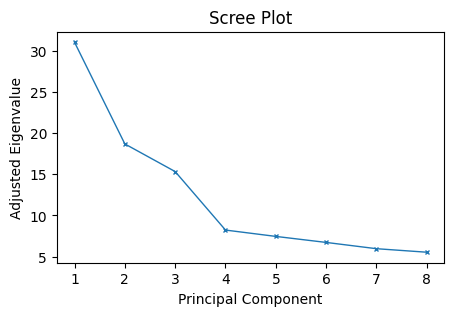

pca done


/home/guonaixin/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.382e-02, tolerance: 1.492e-02
  model = cd_fast.enet_coordinate_descent(
/home/guonaixin/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.346e-02, tolerance: 1.492e-02
  model = cd_fast.enet_coordinate_descent(


74
best_lambda 0.0018041864093920718
3.043521081201244e-17


/home/guonaixin/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e-02, tolerance: 1.492e-02
  model = cd_fast.enet_coordinate_descent(


In [119]:
# r_train=r
# W_train=W
# arraynumber = len(r_train)
# n,S = W_train.shape
# print(arraynumber)


Farmpredict = Farmpredict()
# freq_index=Farmpredict.pca()[-1]
pcafactor, pcau,loading,freq_index=Farmpredict.pca()
# regLR = linear_model.LinearRegression(n_jobs= 30)
# regLR.fit(pcafactor,r_train)
# insregLRint = regLR.intercept_  
# insregLRcoef = regLR.coef_   # output In-Sample linear regression coefficients
# yu = r_train - insregLRint- pcafactor @ insregLRcoef
# print(len(yu))
pcau.shape
beta_pos,beta_neg,S_set,lasso_index,lasso_Beta,lasso_beta,loading,insregLRcoef,lasso_alpha,insregLRint = Farmpredict.fit()
newscore = Farmpredict.predict()


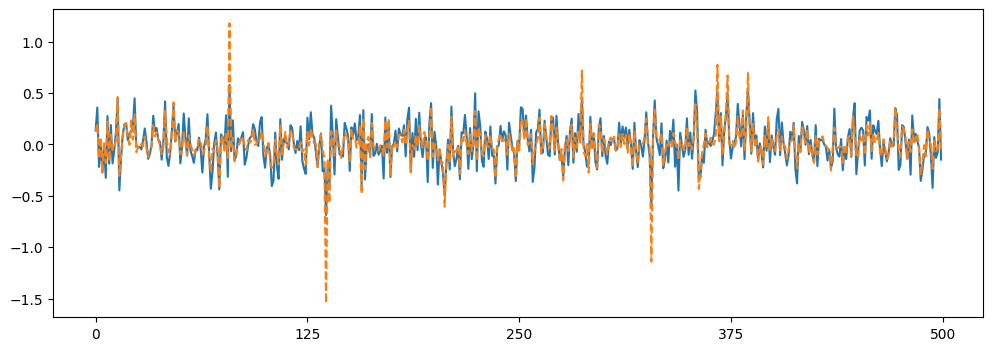

In [122]:
fig = plt.figure(figsize = (12,4))
plt.plot(r_test[:500])
plt.plot(newscore[:500],linestyle='--')
plt.xticks(np.linspace(0,500,5))
plt.show()

In [259]:

pos_index = [S_set[i] for i in np.where(lasso_beta>0)[0]]
neg_index = [S_set[i] for i in np.where(lasso_beta<0)[0]]
fq_pos = {}
fq_neg = {}

# W_train=W_train[:,freq_index]
for i in range(len(pos_index)):
# calculte f* to screen
    fq_pos[pos_index[i]] = lasso_beta[np.where(lasso_beta>0)[0][i]]
    # if  fq_pos[i] ==1:
    #     print(i,appearance_word[i])
for i in range(len(neg_index)):
    fq_neg[neg_index[i]] = abs(lasso_beta[np.where(lasso_beta<0)[0][i]])
    


In [267]:
beta_pos = {S_set[i]:lasso_beta[i] for i in np.where(lasso_beta>0)[0]}

In [57]:
dict1 = {}
for i in set(stkcd1):
    iindex = np.where(stkcd1 == i)[0]
    dict1[i]=iindex 

rrtest = r_test[dict1[55976]]
WWtest= W_test[dict1[55976]]


(-0.5, 399.5, 199.5, -0.5)

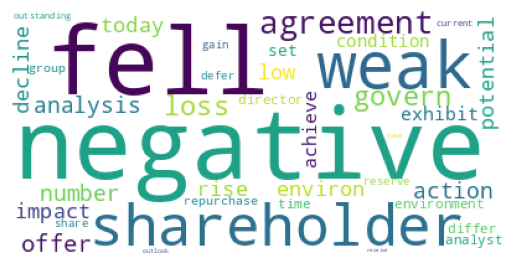

In [81]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
# df_words = pd.read_csv('/home/yuanzhi/Text_individual/codes/' + word_file)
# df_words = df_words.dropna().reset_index(drop = True).reset_index()
# Wsum = sum(W_train)
# freq_index = [heapq.nlargest(10000, enumerate(Wsum), key=lambda x: x[1])[i][0] for i in range(10000)]
# ex_df_words = df_words.final_word[freq_index]

betaneg = {list(ex_df_words)[k]: -v for k, v in beta_neg.items()}
# betaneg = {k: -v for k, v in beta_neg.items()}
plt.imshow(WordCloud(background_color='white').generate_from_frequencies(frequencies=betaneg))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

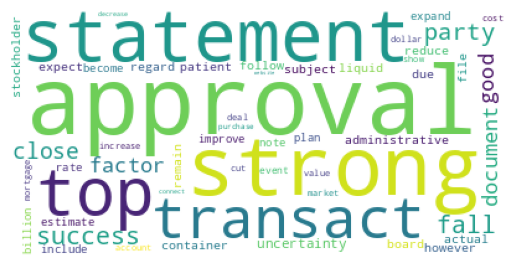

In [83]:
beta_pos = {list(ex_df_words)[k]: v for k, v in beta_pos.items()}
        
plt.imshow(WordCloud(background_color='white').generate_from_frequencies(frequencies=beta_pos))
plt.axis("off")

In [61]:
W_test.shape

(1000, 500)

In [60]:
jobs=30
def calc_R2(y, haty):
    return 1 - np.sum(np.power((y - haty),2))/np.sum(np.power(y,2))

def calc_RMSE(y, haty, n):
    return np.sqrt(np.sum(np.power((y - haty),2))/n)

def calc_perform(n, B, W, lassoBeta, lassoIndex, r, insregLRint, insregLRcoef, lasso_alpha):
    '''
    Input:
        n: Number of News, same as input n of Farmpredict
        B: loading, same as output loading of Farmpredict
        W: sparse matrix, same as input W of Farmpredict
        lassoBeta: optimal lasso model's coefficients, same as output lasso_beta of Farmpredict
        r: stock return, same as input r of Farmpredict
        insregLRint: same as output insregLRint of Farmpredict
        insregLRcoef: same as output insregLRcoef of Farmpredict
        lasso_alpha: same as output lasso_alpha of Farmpredict
    Return:
        Rsquare: R2 calculate by function calc_R2
        Rmse: RMSE calculate by function calc_RMSE
        r_new_hat: predicted stock returns
    '''
    pcafactor_new = ((np.linalg.inv(B.T @ B)) @ (B.T) @ (W.T)).T
    pcau_new = W - (B @ (pcafactor_new.T)).T
    
    pcaus_new = pcau_new[:,lassoIndex]

    regLR_u_new = linear_model.LinearRegression(n_jobs=jobs)
    
    xtilde_new = np.zeros((n, len(lassoIndex)))
    for i in range(len(lassoIndex)):
        regLR_u_new.fit(pcafactor_new, pcaus_new[:,i])
        xtilde_new[:,i] = pcaus_new[:,i] - regLR_u_new.intercept_ - pcafactor_new @ regLR_u_new.coef_
        
    yu_new = xtilde_new @ lassoBeta + lasso_alpha
    
    r_new_hat = insregLRint + yu_new + pcafactor_new @ insregLRcoef
        
    Rsquare = calc_R2(r, r_new_hat)
    Rmse = calc_RMSE(r, r_new_hat, n)
    # return r_new_hat
    return Rsquare,Rmse,r_new_hat

n,S = W_train.shape
print(calc_perform(n, loading, W_train[:,freq_index], lasso_beta, lasso_index, r_train, insregLRint, insregLRcoef, lasso_alpha)[:2])
n,S = W_test.shape
print(calc_perform(n, loading, W_test[:,freq_index], lasso_beta, lasso_index, r_test, insregLRint, insregLRcoef, lasso_alpha)[:2])

(0.7767436493796956, 0.09775515382027226)
(0.6914939820279162, 0.11232314594875203)


In [71]:
W_test.shape

(3000, 20000)